In [ ]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/EuropHeight_samples/Paris_Height_Asc_Desc_100000.csv'
#path = '/content/drive/My Drive/EuropHeight_samples/Rome_Height_Asc_Desc_100000.csv'
Table0 = pd.read_csv(path)
#print(Table0)
#print(Table0.head())
#Table0.info()
Table0 = Table0[['U1', 'U2', 'U3', 'U4', 'VH_A', 'VH_D1', 'VH_D2', 'VV_A', 'VV_D1', 'VV_D2', 'NL', 'Height']].dropna()
#Table0.value_counts()   # Categorical data

In [ ]:
#AllData = pd.concat([Table0, Table1, Table2, Table3, Table4, Table5])
AllData = Table0
AllData.value_counts()

U1        U2        U3        U4        VH_A        VH_D1       VH_D2       VV_A        VV_D1      VV_D2      NL         Height
0.876543  0.779180  0.860367  0.844869  -11.026718  -12.170865  -10.980545  -6.062922   -5.743468  -5.346844  73.749168  13        3
1.000000  1.000000  0.992948  0.988862  -10.498143  -9.587001   -8.515245   -5.126742   -7.770350  -7.094887  53.321667  15        3
0.839506  0.924290  0.928068  0.875895  -12.969076  -5.658848   -11.356004  -6.400010   -1.507590  -1.386262  65.718330  11        2
1.000000  0.968454  0.813822  0.774861  -4.428389   -6.785262   -6.611445    0.305227   -4.303724  -2.122895  55.964169  24        2
0.802469  0.788644  0.826516  0.855211  -10.519285  -8.814053   -7.259152   -3.335274    2.536438  -3.017132  68.355003  10        2
                                                                                                                                  ..
0.740741  0.684543  0.722144  0.697693  -11.264610  -12.634265  -11.889372  -7.812261   -7.591980  -8.375231  49.600002  11        1
                    0.705219  0.768496  -15.199462  -1.185542   -0.541173   -1.055798    2.461794   1.313097  53.412498  20        1
                    0.699577  0.682578  -10.336844  -11.996878  -12.283301  -2.807530    2.718047   1.761153  68.345001  13        1
                    0.660085  0.674622  -14.322760  -13.718282  -11.923513  -8.592269   -8.772320  -7.684993  43.868332  7         1
1.000000  1.000000  1.000000  1.000000   11.793987  -6.203618   -1.586725    12.644505  -1.635783   2.532429  68.427498  22        1
Name: count, Length: 32506, dtype: int64

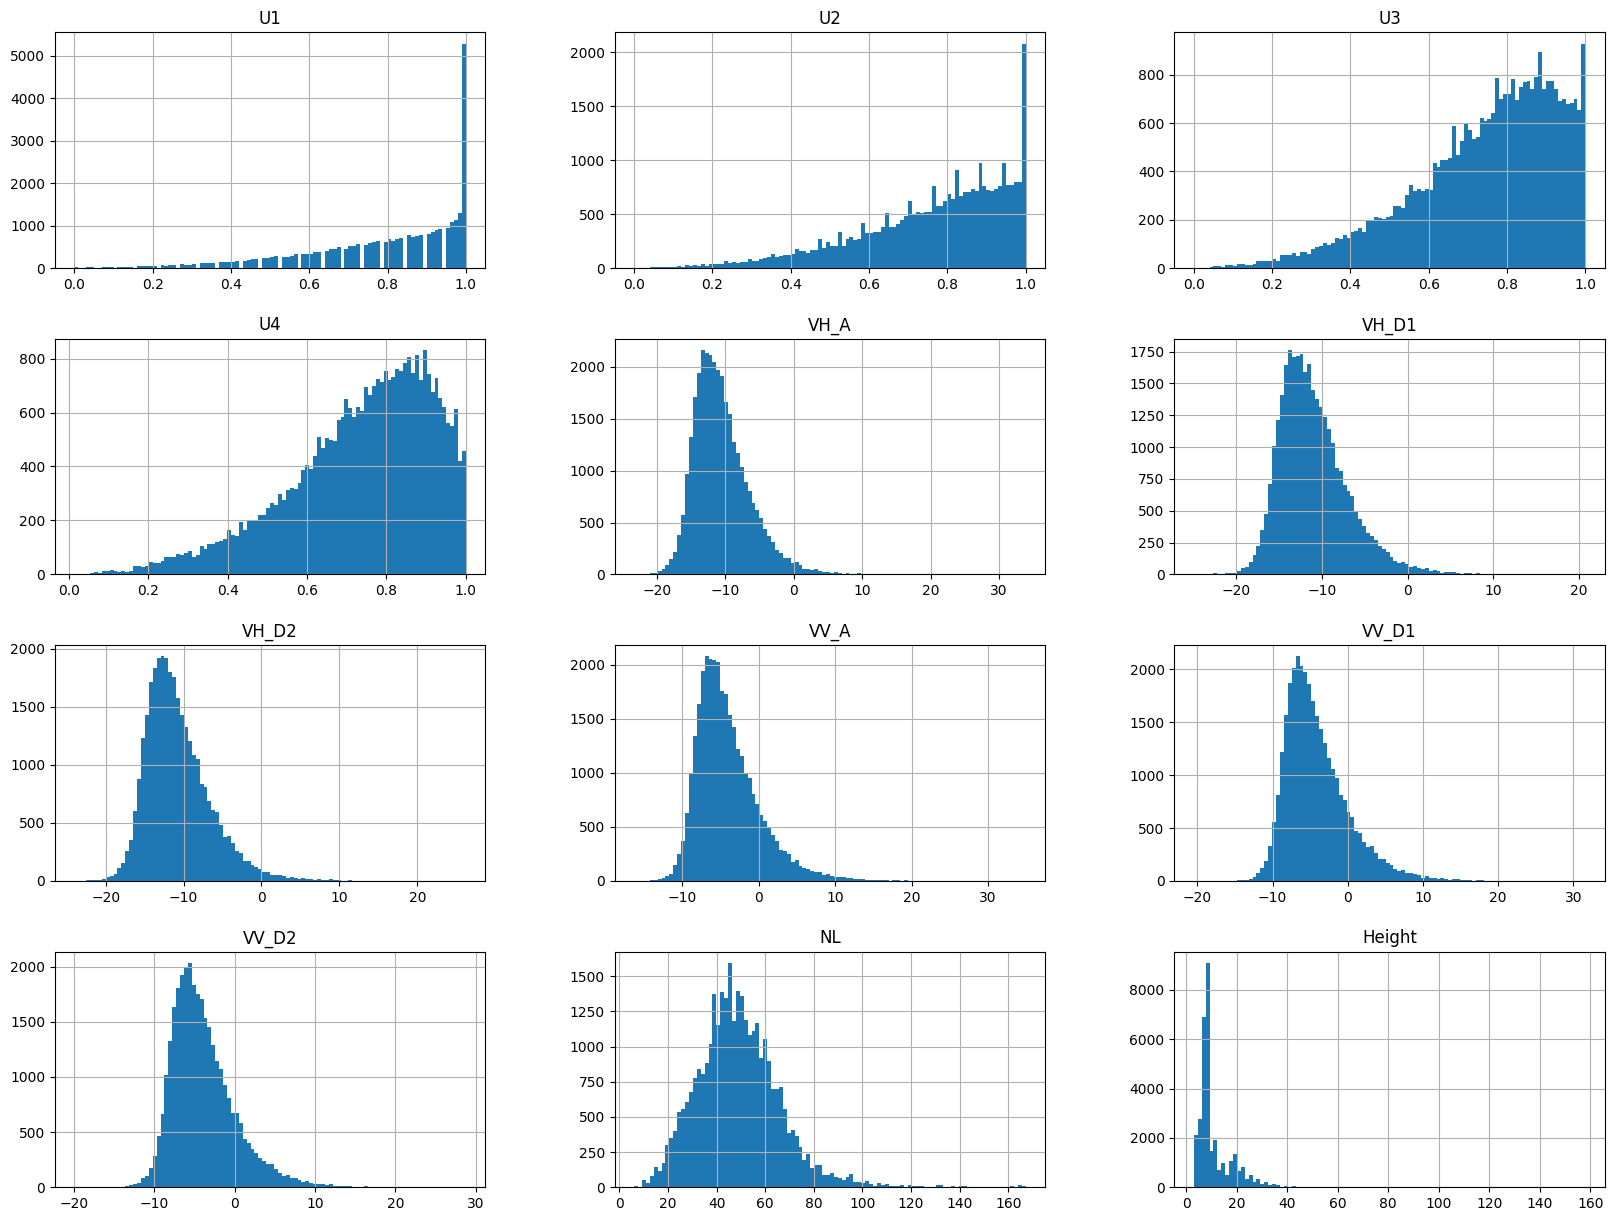

In [ ]:
import matplotlib.pyplot as plt
AllData.hist(bins=100, figsize=(20,15))
plt.show()

# Split Dataset into train and test sections

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
## Feature X1
#X = AllData[['VV_A']]
## Feature X2
#X = AllData[['VV_A','VH_A']]
## Feature X3
#X = AllData[['VV_A','VV_D1']]
## Feature X4
#X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1']]
## Feature X5
#X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1','VV_D2', 'VH_D2']]
## Feature X6
#X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1','VV_D2', 'VH_D2', 'U1']]
## Feature X7
#X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1','VV_D2', 'VH_D2', 'U1', 'U2', 'U3', 'U4']]
## Feature X8
#X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1','VV_D2', 'VH_D2', 'U1', 'NL']]
## Feature X9
X = AllData[['VV_A','VH_A','VV_D1', 'VH_D1','VV_D2', 'VH_D2', 'U1', 'U2', 'U3', 'U4', 'NL']]

Y = AllData[['Height']]

Call Accracy assessment libraries

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Linear Regression with Ordinary Least Squares

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

MSE for each fold:  [45.43046473 41.57389912 46.94538408 45.16671915 42.16361337]
R2 score for each fold:  [0.25378321 0.22435212 0.24494496 0.25101117 0.25026811]
Average MSE:  44.25601609065202
StD MSE:  2.0500395343992572
Average MAE:  4.3404309769747815
StD MAE:  0.028204585075763754
Average R2 score:  0.24487191328325367
StD R2 score:  0.010651643523459577


# Ridge regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

MSE for each fold:  [45.43078263 41.57385427 46.94493555 45.16602467 42.16308765]
R2 score for each fold:  [0.25377798 0.22435296 0.24495217 0.25102268 0.25027746]
Average MSE:  44.25573695168456
StD MSE:  2.050015657522281
Average MAE:  4.340329630312128
StD MAE:  0.028196590960389813
Average R2 score:  0.2448766520543631
StD R2 score:  0.010652733742079222


# Support Vector Regression- Linear

In [ ]:
 from sklearn.svm import SVR
 reg = SVR(kernel='linear')

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

MSE for each fold:  [51.66030932 45.90104695 53.02323582 50.67125422 47.32308918]
R2 score for each fold:  [0.15145507 0.14362015 0.14719067 0.15973079 0.15852494]
Average MSE:  49.715787098008796
StD MSE:  2.679945778950164
Average MAE:  4.087261076422555
StD MAE:  0.041128849652264425
Average R2 score:  0.15210432378019667
StD R2 score:  0.006259934969223015


# Neural network

In [ ]:
from sklearn import neural_network
reg = neural_network.MLPRegressor()

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed w

MSE for each fold:  [44.34582332 40.57637638 45.77444457 44.30583711 41.65583311]
R2 score for each fold:  [0.27159895 0.24296299 0.26377799 0.26528697 0.2592972 ]
Average MSE:  43.33166289766649
StD MSE:  1.9154492060591506
Average MAE:  4.174435630704597
StD MAE:  0.08545663395403331
Average R2 score:  0.2605848200858571
StD R2 score:  0.00965198789601374


# Gradient Boosting Regressor

In [ ]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

MSE for each fold:  [43.81333306 39.53426744 45.8253839  43.34207651 39.81303764]
R2 score for each fold:  [0.28034536 0.26240571 0.2629587  0.28126878 0.29206485]
Average MSE:  42.4656197118545
StD MSE:  2.429055001346995
Average MAE:  4.058295270652826
StD MAE:  0.03154538716110072
Average R2 score:  0.2758086778564558
StD R2 score:  0.011484064784105297


# Random Forest Regressor

In [ ]:
from sklearn import ensemble
reg = ensemble.RandomForestRegressor(max_depth=5)

In [ ]:
cv_results = cross_validate(reg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

MSE for each fold:  [45.36000729 39.99901226 46.68933054 45.12475462 40.42546313]
R2 score for each fold:  [0.2549405  0.25373493 0.24906325 0.25170705 0.28117501]
Average MSE:  43.51971356791311
StD MSE:  2.7560490906192694
Average MAE:  4.132663741203983
StD MAE:  0.037826788450037965
Average R2 score:  0.25812414815886314
StD R2 score:  0.01169634276398547


# Voting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(max_depth=5, random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [ ]:
cv_results = cross_validate(ereg, X, Y, cv=kf, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','r2'])
print("MSE for each fold: ", -cv_results['test_neg_mean_squared_error'])
print("R2 score for each fold: ", cv_results['test_r2'])
print("Average MSE: ", -cv_results['test_neg_mean_squared_error'].mean())
print("StD MSE: ", cv_results['test_neg_mean_squared_error'].std())
print("Average MAE: ", -cv_results['test_neg_mean_absolute_error'].mean())
print("StD MAE: ", cv_results['test_neg_mean_absolute_error'].std())
print("Average R2 score: ", cv_results['test_r2'].mean())
print("StD R2 score: ", cv_results['test_r2'].std())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

MSE for each fold:  [44.13184784 39.4979608  45.59853498 43.76710733 39.93195324]
R2 score for each fold:  [0.2751136  0.26308309 0.26660727 0.27422059 0.28995035]
Average MSE:  42.58548083896822
StD MSE:  2.426519155237504
Average MAE:  4.12329506458835
StD MAE:  0.03208251464426684
Average R2 score:  0.27379497952045917
StD R2 score:  0.009266324450740597
